In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_complaints=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df_complaints["date_index"] = df_complaints["Date_month_year"] + " " + df_complaints["Time"]

In [5]:
df_complaints["date_index"].head(2)

0     22-Apr-15 3:53:50 PM
1    04-Aug-15 10:22:56 AM
Name: date_index, dtype: object

In [6]:
df_complaints["date_index"]=pd.to_datetime(df_complaints["date_index"])
df_complaints["date_index"].head(2)

0   2015-04-22 15:53:50
1   2015-08-04 10:22:56
Name: date_index, dtype: datetime64[ns]

In [7]:
df_complaints.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [8]:
df_complaints["Date_month_year"] = pd.to_datetime(df_complaints["Date_month_year"])

In [9]:
df_complaints.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [10]:
df_complaints.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56


In [11]:
df_complaints=df_complaints.set_index(df_complaints["date_index"])

In [12]:
df_complaints.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56


In [20]:
df_complaints["Date_month_year"].value_counts().head(5)

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: Date_month_year, dtype: int64

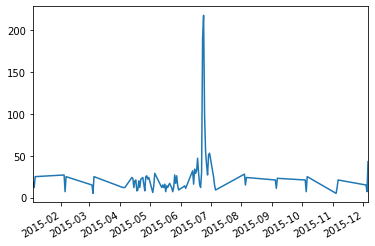

In [13]:
df_complaints["Date_month_year"].value_counts().plot()

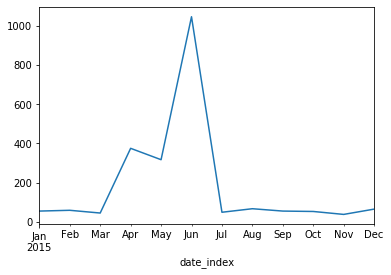

In [14]:
df_complaints.groupby(pd.Grouper(freq="M")).size().plot()

In [15]:
df_complaints.groupby(pd.Grouper(freq="M")).size()

date_index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

In [16]:
df_complaints["Status"].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [17]:
df_complaints["StatusCategory"]=["Open" if Status=="Open" or Status=="Pending" else "Closed" 
                                 for Status in df_complaints["Status"]]

In [18]:
df_complaints.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,StatusCategory
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [19]:
ComplaintsPerState=df_complaints.groupby('State').size().sort_values(ascending=False)
ComplaintsPerState.head(10)

State
Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       143
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
dtype: int64

In [20]:
ComplaintStatus=df_complaints.groupby(["State","StatusCategory"]).size()

In [22]:
ComplaintStatus.head(10)

State        StatusCategory
Alabama      Closed             17
             Open                9
Arizona      Closed             14
             Open                6
Arkansas     Closed              6
California   Closed            159
             Open               61
Colorado     Closed             58
             Open               22
Connecticut  Closed              9
dtype: int64

In [23]:
ComplaintStatus=ComplaintStatus.unstack().fillna(0)

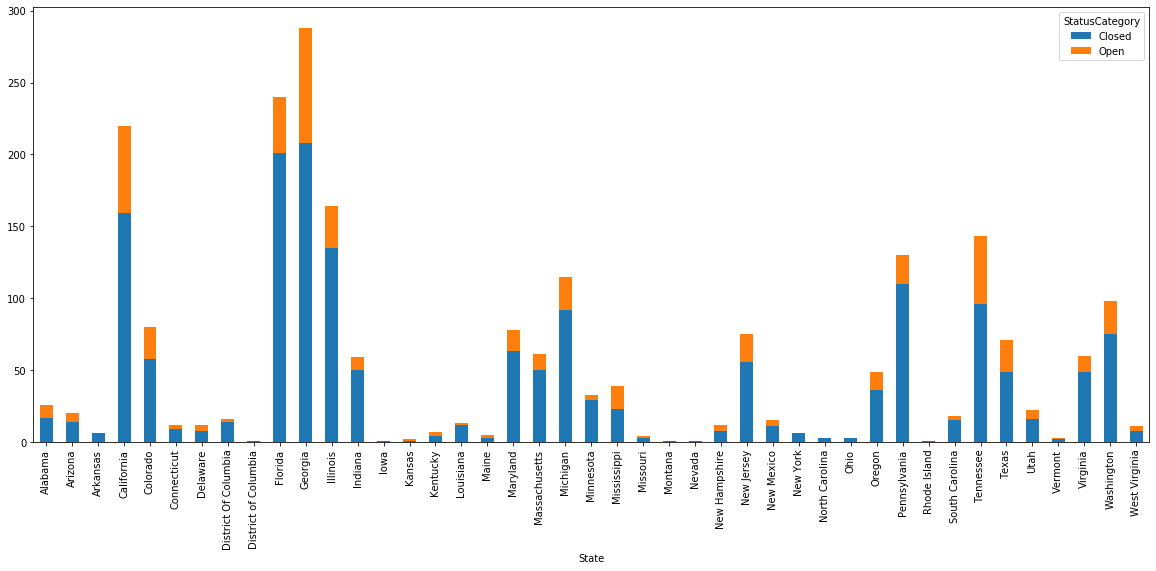

In [24]:
ComplaintStatus.plot(kind="bar", figsize=(20,8),stacked=True)

In [27]:
ComplaintsPerState.to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [34]:
df_complaints.groupby(["State","StatusCategory"]).size().unstack().fillna(0).max()

StatusCategory
Closed    208.0
Open       80.0
dtype: float64

In [36]:
!pip install wordcloud

In [37]:
!pip install gensim

In [38]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

import gensim
from gensim import corpora

In [39]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [40]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [41]:
ListComplaints = df_complaints["Customer Complaint"].tolist()
ListComplaints

['Comcast Cable Internet Speeds',
 'Payment disappear - service got disconnected',
 'Speed and Service',
 'Comcast Imposed a New Usage Cap of 300GB that punishes streaming.',
 'Comcast not working and no service to boot',
 'ISP Charging for arbitrary data limits with overage fees',
 'Throttling service and unreasonable data caps',
 'Comcast refuses to help troubleshoot and correct my service.',
 'Comcast extended outages',
 'Comcast Raising Prices and Not Being Available To Ask Why',
 'Billing after service was asked to be disconnected',
 'YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE',
 'Comcast Violating Open Internet Rules by Blocking HBO Go Access on Sony Consoles',
 'Internet speed',
 'Internet Disconnects Every Night',
 'Internet complaint',
 'Internet Availability and Speed',
 'Comcast owes me $65 and claims I need to return equipment I never had',
 'Horrible Internet Service',
 'Failure to provide services that I am billed for.',
 'Internet out all the time but they have a mono

In [43]:
SplitWords = [clean(LC).split() for LC in ListComplaints]
SplitWords

[['comcast', 'cable', 'internet', 'speed'],
 ['payment', 'disappear', 'service', 'got', 'disconnected'],
 ['speed', 'service'],
 ['comcast',
  'imposed',
  'new',
  'usage',
  'cap',
  '300gb',
  'punishes',
  'streaming'],
 ['comcast', 'working', 'service', 'boot'],
 ['isp', 'charging', 'arbitrary', 'data', 'limit', 'overage', 'fee'],
 ['throttling', 'service', 'unreasonable', 'data', 'cap'],
 ['comcast', 'refuse', 'help', 'troubleshoot', 'correct', 'service'],
 ['comcast', 'extended', 'outage'],
 ['comcast', 'raising', 'price', 'available', 'ask'],
 ['billing', 'service', 'asked', 'disconnected'],
 ['yahoo', 'failure', 'restore', 'email', 'search', 'feature'],
 ['comcast',
  'violating',
  'open',
  'internet',
  'rule',
  'blocking',
  'hbo',
  'go',
  'access',
  'sony',
  'console'],
 ['internet', 'speed'],
 ['internet', 'disconnect', 'every', 'night'],
 ['internet', 'complaint'],
 ['internet', 'availability', 'speed'],
 ['comcast', 'owes', '65', 'claim', 'need', 'return', 'equipm

In [44]:
dictionary = corpora.Dictionary(SplitWords)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [45]:
term_matrix = [dictionary.doc2bow(tm) for tm in SplitWords]
term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [46]:
from gensim.models import LdaModel

In [47]:
Num_Topic = 10
ldamodel = LdaModel(term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [48]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.110*"comcast" + 0.051*"contract" + 0.042*"bill" + 0.031*"fee" + 0.025*"access" + 0.020*"bandwidth" + 0.018*"refund" + 0.018*"without" + 0.018*"account" + 0.015*"unauthorized"')

(1, '0.084*"throttling" + 0.067*"internet" + 0.052*"connection" + 0.044*"comcastxfinity" + 0.025*"intermittent" + 0.021*"lack" + 0.021*"low" + 0.019*"charged" + 0.019*"mb" + 0.018*"fee"')

(2, '0.140*"comcast" + 0.114*"charge" + 0.062*"xfinity" + 0.044*"service" + 0.030*"false" + 0.025*"overage" + 0.024*"2" + 0.021*"cramming" + 0.017*"failure" + 0.016*"monopoly"')

(3, '0.097*"billing" + 0.093*"practice" + 0.067*"comcast" + 0.054*"unfair" + 0.033*"deceptive" + 0.032*"service" + 0.023*"monopolistic" + 0.019*"monthly" + 0.019*"modem" + 0.019*"advertising"')

(4, '0.093*"service" + 0.088*"comcast" + 0.038*"without" + 0.027*"payment" + 0.025*"paying" + 0.023*"unreliable" + 0.021*"rate" + 0.019*"terrible" + 0.019*"high" + 0.019*"quality"')

(5, '0.234*"internet" + 0.140*"comcast" + 0.093*"speed" + 0.068*"serv

In [49]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [50]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8,Topic # 9
0,comcast,throttling,comcast,billing,service,internet,data,comcast,service,comcast
1,contract,internet,charge,practice,comcast,comcast,cap,billing,comcast,pricing
2,bill,connection,xfinity,comcast,without,speed,comcast,issue,customer,service
3,fee,comcastxfinity,service,unfair,payment,service,usage,complaint,price,back
4,access,intermittent,false,deceptive,paying,slow,xfinity,service,poor,show
5,bandwidth,lack,overage,service,unreliable,problem,lied,customer,cable,phone
6,refund,low,2,monopolistic,rate,get,tucson,email,day,unfair
7,without,charged,cramming,monthly,terrible,outage,300gb,shitty,internet,availability
8,account,mb,failure,modem,high,promised,cost,provide,bill,throttled
9,unauthorized,fee,monopoly,advertising,quality,business,misrepresentation,fraudulent,help,plan
